# Fisher Information

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import torch

# Example - KL Divergence of 1D Gaussians

In [2]:
def pdf(x, mu, sigma):
    coeff = 1 / np.sqrt(2 * np.pi * sigma ** 2)
    expo = - (x - mu) ** 2 / (2 * sigma ** 2)
    return coeff * np.exp(expo)

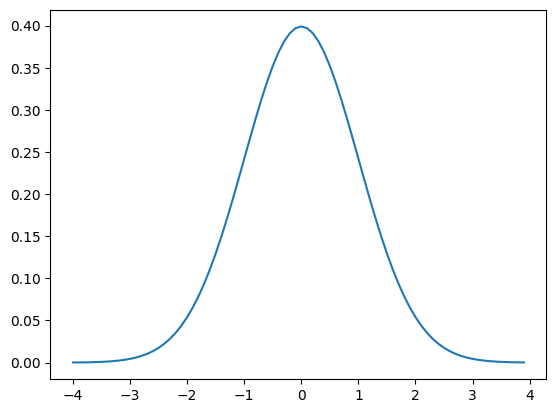

In [3]:
mu = 0.0
sigma = 1.0

xs = np.arange(-4*sigma, 4*sigma, 0.1)
ys = pdf(xs, mu, sigma)

plt.plot(xs, ys)

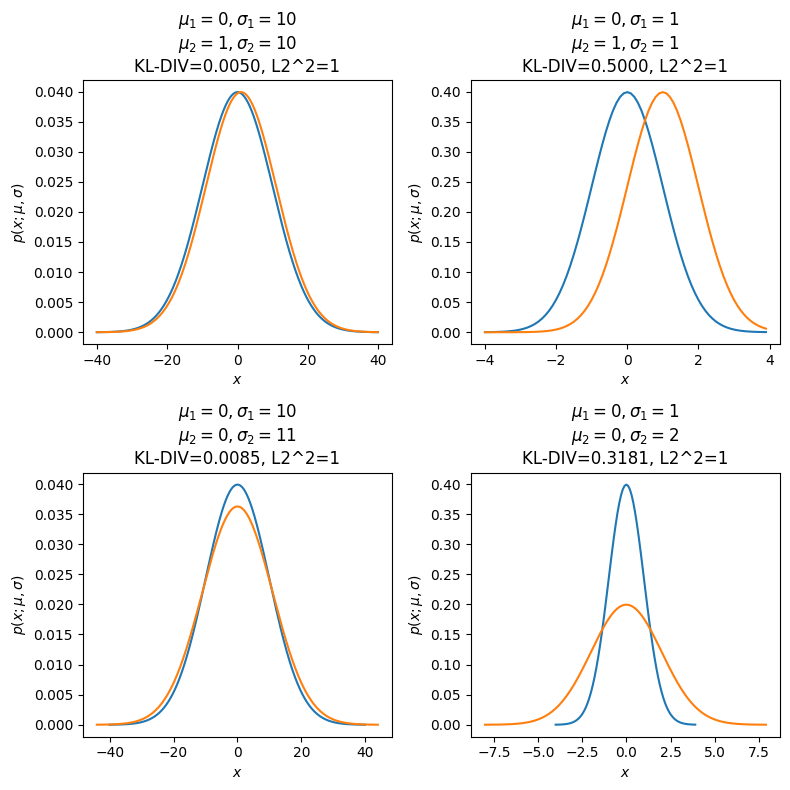

In [4]:
def kldiv(mu1, sigma1, mu2, sigma2):
    return np.log(sigma2 / sigma1) + (sigma1 ** 2 + (mu1 - mu2) **2)/ (2* (sigma2 ** 2)) - 1/2

def plot_two_gauss(mu1, sigma1, mu2, sigma2):
    xs = np.arange(-4*sigma1, 4*sigma1, 0.1)
    ys = pdf(xs, mu1, sigma1)
    plt.plot(xs, ys)
    
    xs = np.arange(-4*sigma2, 4*sigma2, 0.1)
    ys = pdf(xs, mu2, sigma2)
    plt.plot(xs, ys)   
    
    l2_square = (mu1 - mu2) ** 2 + (sigma1 - sigma2) ** 2
    kl = kldiv(mu1, sigma1, mu2, sigma2)
    plt.title(f"$\mu_1={mu1}, \sigma_1={sigma1}$\n$\mu_2={mu2}, \sigma_2={sigma2}$\nKL-DIV={kl:.4f}, L2^2={l2_square}")
    plt.xlabel("$x$")
    plt.ylabel("$p(x; \mu, \sigma)$")

plt.figure(figsize=(8, 8))

plt.subplot(2,2,1)
plot_two_gauss(0, 10, 1, 10)

plt.subplot(2,2,2)
plot_two_gauss(0, 1, 1, 1)

plt.subplot(2,2,3)
plot_two_gauss(0, 10, 0, 11)

plt.subplot(2,2,4)
plot_two_gauss(0, 1, 0, 2)

plt.tight_layout()

# NGD

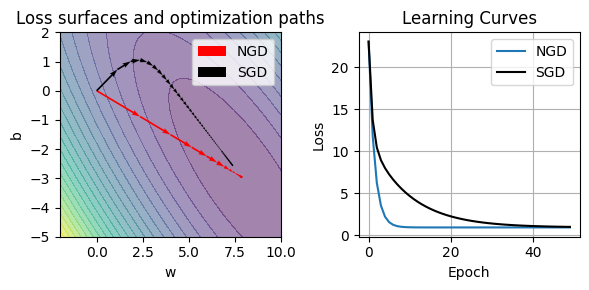

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Linear regression model with two parameters (slope and intercept)
def linear_model(w, b, X):
    return X*w + b

# Mean Squared Error (MSE) loss function
def mse_loss(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)


#Training loop with regularization
def train(X, y, w, b, lr, num_epochs=200, mode="NGD"):
    # Initialize model parameters
    w_list = [w]
    b_list = [b]
    loss_list = []

    # Optimization loop
    for epoch in range(num_epochs):        
        loss_list.append(mse_loss(y, linear_model(w, b, X)))  # learning curve
        y_pred = linear_model(w, b, X)       
        gradient = np.array([[-2 * np.mean(X * (y - y_pred))],
                              [-2 * np.mean(y - y_pred)]])

        if mode == "NGD":
            F = np.array([[np.mean(X**2) , np.mean(X)],
                          [np.mean(X)   , 1]])
            gradient = np.linalg.inv(F).dot(gradient)
        elif mode == "SGD":
            pass  # don't need to modify the gradient for SGD
        else:
            raise ValueError("unknown mode: ", mode)
        
        # Update parameters using gradient descent
        w -= (lr * gradient[0])[0]
        b -= (lr * gradient[1])[0]
     
        # Store parameters for visualization
        w_list.append(w)
        b_list.append(b)              

    return w_list, b_list, loss_list


learning_rate = 0.15
X1 = 0.7+0.5*np.random.randn(500, 1)
y1 = 8 * X1 -3 + np.random.randn(500, 1)

# train model
w_list, b_list, loss_list = train(X1, y1, 0, 0, learning_rate, 50, mode="NGD")
w_list_sgd, b_list_sgd, loss_list_sgd = train(X1, y1, 0, 0, learning_rate, 50, mode="SGD")

plt.figure(figsize=(6, 3))
# Compute the loss surface
w = np.linspace(-2, 10, 100)
b = np.linspace(-5, 2, 100)
W, B = np.meshgrid(w, b)
Z1 = np.zeros_like(W)
Z2 = np.zeros_like(W)
for i in range(100):
    for j in range(100):
        Z1[i, j] = mse_loss(y1, linear_model(W[i, j], B[i, j], X1))
# Plot the loss surface for task 1
plt.subplot(1, 2, 1)
plt.contourf(W, B, Z1, 20, alpha=0.5)

#Plot the optimization paths
plt.quiver(w_list[:-1], b_list[:-1], np.array(w_list[1:]) - np.array(w_list[:-1]), np.array(b_list[1:]) - np.array(b_list[:-1]), 
           scale_units='xy', angles='xy', scale=1, color='r',  label='NGD')
plt.quiver(w_list_sgd[:-1], b_list_sgd[:-1], np.array(w_list_sgd[1:]) - np.array(w_list_sgd[:-1]), np.array(b_list_sgd[1:]) - np.array(b_list_sgd[:-1]), 
           scale_units='xy', angles='xy', scale=1, color='black',  label='SGD')

plt.xlabel('w')
plt.ylabel('b')
plt.title('Loss surfaces and optimization paths')
plt.legend()

#Plot the concatenated loss lists
plt.subplot(1, 2, 2)
plt.plot(loss_list, label='NGD')
plt.plot(loss_list_sgd, label='SGD', color="black")
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Learning Curves')
plt.legend()
plt.grid(True)

plt.tight_layout()

NGD is also more stable. Let's see what happens with a higher learning rate:

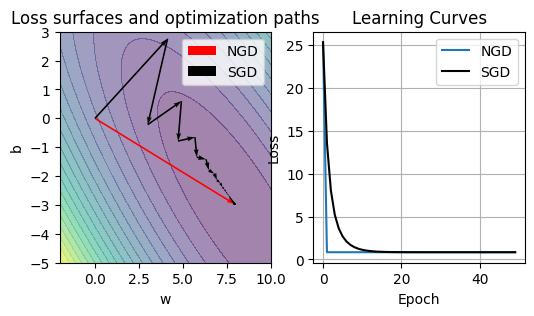

In [8]:
learning_rate = 0.5
X1 = 0.7+0.5*np.random.randn(500, 1)
y1 = 8 * X1 -3 + np.random.randn(500, 1)

# train model
w_list, b_list, loss_list = train(X1, y1, 0, 0, learning_rate, 50, mode="NGD")
w_list_sgd, b_list_sgd, loss_list_sgd = train(X1, y1, 0, 0, learning_rate, 50, mode="SGD")

plt.figure(figsize=(6, 3))
# Compute the loss surface
w = np.linspace(-2, 10, 100)
b = np.linspace(-5, 3, 100)
W, B = np.meshgrid(w, b)
Z1 = np.zeros_like(W)
Z2 = np.zeros_like(W)
for i in range(100):
    for j in range(100):
        Z1[i, j] = mse_loss(y1, linear_model(W[i, j], B[i, j], X1))
# Plot the loss surface for task 1
plt.subplot(1, 2, 1)
plt.contourf(W, B, Z1, 20, alpha=0.5)

#Plot the optimization paths
plt.quiver(w_list[:-1], b_list[:-1], np.array(w_list[1:]) - np.array(w_list[:-1]), np.array(b_list[1:]) - np.array(b_list[:-1]), 
           scale_units='xy', angles='xy', scale=1, color='r',  label='NGD')
plt.quiver(w_list_sgd[:-1], b_list_sgd[:-1], np.array(w_list_sgd[1:]) - np.array(w_list_sgd[:-1]), np.array(b_list_sgd[1:]) - np.array(b_list_sgd[:-1]), 
           scale_units='xy', angles='xy', scale=1, color='black',  label='SGD')

plt.xlabel('w')
plt.ylabel('b')
plt.title('Loss surfaces and optimization paths')
plt.legend()

#Plot the concatenated loss lists
plt.subplot(1, 2, 2)
plt.plot(loss_list, label='NGD')
plt.plot(loss_list_sgd, label='SGD', color="black")
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Learning Curves')
plt.legend()
plt.grid(True)
plt.show()





# DNN - EWC

multi-head MLP on SplitMNIST with task labels.

In [11]:
from collections import defaultdict
from torch.utils.data import DataLoader
import torch
from torch.distributions import Categorical
import copy


class EWC:
    def __init__(self, lamb, device='cpu'):
        self.lamb = lamb
        self.device = device

        # we keep a separate penalty term for each task
        # we need to save the model for each task and its Fisher diagonal
        self.prev_models = defaultdict(dict)
        self.fishers = defaultdict(dict)

    def __call__(self, new_model):
        """Compute EWC penalty."""   
        penalty = torch.tensor(0).float().to(self.device)

        for tid in self.fishers.keys():  # for each task
            for name, cur_param in model.model.features.named_parameters():  # for each param
                old_param = self.prev_models[tid][name]
                F = self.fishers[tid][name]

                # sum (F_i * (theta_new[i] - theta_tid[i]) ** 2) 
                penalty += (F * (cur_param - old_param).pow(2)).sum()
        
        return self.lamb * penalty
    
    def update(self, model, data, max_samples=200):
        """Compute importances of parameters after each experience.

        This implementation is quite inefficient but easy to understand (or at least as easy as possible).
        """
        model.eval()
        cnt = 0
        F = {}
        dl = DataLoader(data.eval(), batch_size=1, shuffle=True)
        for x, y, t in dl:
            for p in model.parameters():  # zero-grad
                p.grad = None

            yp = model(x, t)
            yp = yp[0]  # there is a single example in the mini-batch

            # we need to sample from yp = p(y | x)
            p = Categorical(torch.softmax(yp, dim=0))
            ysample = p.sample()

            # log-likelihood of sampled class
            ll = torch.log_softmax(yp, dim=0)[ysample]
            ll.backward()

            # we compute the fisher only for the feature extractor
            for n, p in model.model.features.named_parameters():
                if n in F:
                    F[n] += p.grad ** 2
                else:
                    F[n] = p.grad ** 2
            cnt += 1

        for n, p in F.items():
            F[n] = p / cnt
        
        tid = len(self.fishers)  # current task id
        self.fishers[tid] = F
        self.prev_models[tid] = dict(copy.deepcopy(model.model.features).named_parameters())

In [24]:
from avalanche.evaluation.metrics import Accuracy


@torch.no_grad()
def eval_stream(model, stream):
    """Evaluate `model` on `stream` computing `metrics`.
    Returns a dictionary {metric_name: list-of-results}.
    """
    acc = Accuracy()
    model.eval()
    for eid, exp in enumerate(stream):
        avalanche_model_adaptation(model, exp)
        acc.reset()
        dl = DataLoader(exp.dataset.eval(), batch_size=512, num_workers=8)
        for x, y, t in dl:
            # x, y = x.cuda(), y.cuda()  # move to gpu if possible
            yp = model(x, t)
            acc.update(yp, y)
        print(f"\tExp{eid} - ACC={acc.result():.2f}")

In [25]:
from avalanche.benchmarks import SplitMNIST
from torch.optim import SGD
from torch.nn import CrossEntropyLoss
from avalanche.models import SimpleMLP
from avalanche.training import Naive
from torch.utils.data import DataLoader
import torch.nn.functional as F
from avalanche.models.utils import avalanche_model_adaptation
from avalanche.models.dynamic_optimizers import reset_optimizer
from avalanche.models.utils import avalanche_model_adaptation
from avalanche.models import as_multitask
from torch import nn

# scenario
benchmark = SplitMNIST(
    n_experiences=5,
    return_task_id=True,
    seed=1
)

# model
class MLP(nn.Module):
    def __init__(self):
        super().__init__()
        self.features = nn.Sequential(
            nn.Linear(784, 512),
            nn.ReLU(),
            nn.Linear(512, 512),
            nn.ReLU()
        )
        self.classifier = nn.Linear(512, 10)
    
    def forward(self, x, **kwargs):
        x = x.reshape(x.shape[0], -1)
        x = self.features(x)
        return self.classifier(x)

model = as_multitask(MLP(), 'classifier')
optimizer = SGD(model.parameters(), lr=0.001, momentum=0.9)
criterion = CrossEntropyLoss()
device = 'cpu'
num_epochs = 1
ewc_loss = EWC(lamb=10.0)

for time, exp in enumerate(benchmark.train_stream):
    print(f"Experience ({exp.current_experience})")
    model.train()

    # AVALANCHE: model adaptation step adds new parameters
    # In our model: adds a new head for each task
    avalanche_model_adaptation(model, exp)
    # AVALANCHE: We just added parameters to the model. We must also update the optimizer
    reset_optimizer(optimizer, model)
    
    dataset = exp.dataset
    dataset = dataset.train()  # AVALANCHE: activate correct transformation group
    
    for epoch in range(num_epochs):
        dl = DataLoader(dataset, batch_size=128, shuffle=True)
        for x, y, t in dl:
          x, y, t = x.to(device), y.to(device), t.to(device)

          optimizer.zero_grad()
          # AVALANCHE: MultiTaskModels need task labels
          output = model(x, t)
          loss = F.cross_entropy(output, y)
          loss += ewc_loss(model)
          loss.backward()
          optimizer.step()
        print('Train Epoch: {} \tLoss: {:.6f}'.format(epoch, loss.item()))
    ewc_loss.update(model, dataset)

    print(f"Model at time t={time}")
    eval_stream(model, benchmark.test_stream)


Experience (0)
Train Epoch: 0 	Loss: 0.040961
Model at time t=0
	Exp0 - ACC=0.52
	Exp1 - ACC=0.00
	Exp2 - ACC=0.50
	Exp3 - ACC=0.00
	Exp4 - ACC=0.00
Experience (1)
Train Epoch: 0 	Loss: 0.043501
Model at time t=1
	Exp0 - ACC=0.52
	Exp1 - ACC=0.48
	Exp2 - ACC=0.50
	Exp3 - ACC=0.00


KeyboardInterrupt: 

In [13]:
Fstacked = [fp.reshape(-1) for _, fp in ewc_loss.fishers[0].items()]
Fstacked = torch.concatenate(Fstacked, dim=0)
Fstacked = Fstacked.detach().cpu().numpy()
Fstacked = - np.sort(-Fstacked)  # sort in descending order

Text(0, 0.5, '$F_i$')

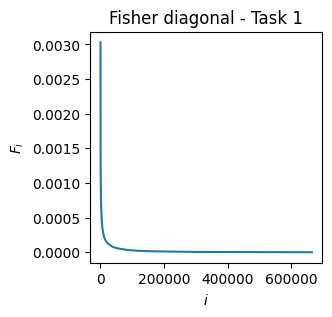

In [14]:
plt.figure(figsize=(3, 3))
plt.plot(Fstacked)
plt.title("Fisher diagonal - Task 1")
plt.xlabel("$i$")
plt.ylabel("$F_i$")